## PCGA dataset review
[2022-09-08]



In [1]:
!export TF_ENABLE_AUTO_MIXED_PRECISION=1

In [2]:
import os
# set log level should be before import tf, to skip "TF_ENABLE_AUTO_MIXED_PRECISION has no effect"
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
# INFO messages are not printed.
# This must be run before loading other modules.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"


import cv2
import numpy as np
import random
from IPython.display import Markdown, display
from matplotlib import pyplot as plt
from PIL import Image

import pandas as pd

import tensorflow as tf
# import tensorflow_similarity as tfsim





In [3]:
cv2.__version__
tf.__version__

'2.6.0'

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.math.add(
    2, 2, name=None
)

<tf.Tensor: shape=(), dtype=int32, numpy=4>

### Dataset

In [6]:
# sources
FV_img = "PACG_fovea_centered_FV"                          #視野
FV_val = "PACG_fovea_centered_FV_value"                    #視野值
FD_img = "PACG_fovea_cnetered_fundus_crop"                 #眼底
FD_cod = "PACG_fovea_cnetered_fundus_crop_FV_referencePT"  #眼點黃斑、光盤座標

data_Dir = "~/data/PACG/"
data_Dir = "/home/u3148947/data/PACG/"

#### FD_cod

In [7]:
FD_cod_list = [os.path.join(data_Dir + FD_cod, file) for file in os.listdir(data_Dir + FD_cod)]
sample_FD_cod_path = random.choice(FD_cod_list) #FV_img_list[1]
# sample_FD_cod = Image.open(sample_FD_cod_path)
sample_FD_cod = open(sample_FD_cod_path).readlines()


display(Markdown("**Fundus  coordinate**"))
display(Markdown(f"*{sample_FD_cod_path}*"))
display(sample_FD_cod)

**Fundus  coordinate**

*/home/u3148947/data/PACG/PACG_fovea_cnetered_fundus_crop_FV_referencePT/3931845.txt*

['819,449\n', '486,487\n', '16']

#### FV_val

In [8]:
FV_val_list = [os.path.join(data_Dir + FV_val, file) for file in os.listdir(data_Dir + FV_val)]
sample_FV_val_path = random.choice(FV_val_list) #FV_img_list[1]
# sample_FD_cod = Image.open(sample_FD_cod_path)
# sample_FV_val = open(sample_FV_val_path).readlines()
sample_FV_val = [txt.replace("\n", "") for txt in open(sample_FV_val_path).readlines()]
# sample_FV_val.remove("") # leave last ""
sample_FV_val = [x for x in sample_FV_val if x] # remove the empty ""



# for txt in open(sample_FV_val_path).readlines():
#     txt.replace("\n", "")
#     txt.remove("")


display(Markdown("**FV value**"))
display(Markdown(f"*{sample_FV_val_path}*"))
display(sample_FV_val)

**FV value**

*/home/u3148947/data/PACG/PACG_fovea_centered_FV_value/4509932_L_FV_value.txt*

['19,23,19,18',
 '19,22,23,24,23,22',
 '21,12,23,25,27,25,24,20',
 '20,23,13,29,27,27,27,24',
 '25,0,28,30,29,26,27,24',
 '24,25,27,28,26,26,24,18',
 '23,25,23,25,24,23',
 '6,21,24,23']

#### FV_val to array

In [9]:
sample_FV_val_arr = [x.split(",") for x in sample_FV_val]

In [10]:
sample_FV_val_arr

[['19', '23', '19', '18'],
 ['19', '22', '23', '24', '23', '22'],
 ['21', '12', '23', '25', '27', '25', '24', '20'],
 ['20', '23', '13', '29', '27', '27', '27', '24'],
 ['25', '0', '28', '30', '29', '26', '27', '24'],
 ['24', '25', '27', '28', '26', '26', '24', '18'],
 ['23', '25', '23', '25', '24', '23'],
 ['6', '21', '24', '23']]

In [11]:
sample_FV_val_arr_one = [] #np.empty(1)
for sub_arr in sample_FV_val_arr:
    #sub_arr=np.array(sub_arr)
    print(sub_arr)
    sample_FV_val_arr_one = np.concatenate((sample_FV_val_arr_one, sub_arr))


['19', '23', '19', '18']
['19', '22', '23', '24', '23', '22']
['21', '12', '23', '25', '27', '25', '24', '20']
['20', '23', '13', '29', '27', '27', '27', '24']
['25', '0', '28', '30', '29', '26', '27', '24']
['24', '25', '27', '28', '26', '26', '24', '18']
['23', '25', '23', '25', '24', '23']
['6', '21', '24', '23']


In [12]:
print(sample_FV_val_arr_one, "\n shape:",sample_FV_val_arr_one.shape)

['19' '23' '19' '18' '19' '22' '23' '24' '23' '22' '21' '12' '23' '25'
 '27' '25' '24' '20' '20' '23' '13' '29' '27' '27' '27' '24' '25' '0' '28'
 '30' '29' '26' '27' '24' '24' '25' '27' '28' '26' '26' '24' '18' '23'
 '25' '23' '25' '24' '23' '6' '21' '24' '23'] 
 shape: (52,)


In [13]:
sample_FV_val_arr_one

array(['19', '23', '19', '18', '19', '22', '23', '24', '23', '22', '21',
       '12', '23', '25', '27', '25', '24', '20', '20', '23', '13', '29',
       '27', '27', '27', '24', '25', '0', '28', '30', '29', '26', '27',
       '24', '24', '25', '27', '28', '26', '26', '24', '18', '23', '25',
       '23', '25', '24', '23', '6', '21', '24', '23'], dtype='<U32')

#### Get FV_val to array

In [14]:
def get_fv_value(sample_FV_val_path):
    sample_FV_val = [txt.replace("\n", "") for txt in open(sample_FV_val_path).readlines()]
    # sample_FV_val.remove("") # leave last ""
    sample_FV_val = [x for x in sample_FV_val if x] # remove the empty ""
    
    sample_FV_val_arr = [x.split(",") for x in sample_FV_val]
    
    sample_FV_val_arr_one = [] #np.empty(1)
    for sub_arr in sample_FV_val_arr:
        #sub_arr=np.array(sub_arr)
        print(sub_arr)
        #sample_FV_val_arr_one = np.concatenate((sample_FV_val_arr_one, sub_arr)) # array with block
        #sample_FV_val_arr_one.append(sub_arr)                                    # array in array with block
        sample_FV_val_arr_one += sub_arr                                          # array without block
        
    #return list(sample_FV_val_arr_one)
    return sample_FV_val_arr_one


In [15]:
get_fv_value("/home/u3148947/data/PACG/PACG_fovea_centered_FV_value/5785071_FV_value.txt")

['0', '0', '0', '0']
['0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '4', '0', '0', '0']
['0', '0', '0', '0', '27', '7', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0']
['0', '0', '0', '0']


['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '4',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '27',
 '7',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

### file name and FV value list

In [100]:
file_name_list = []
FV_val_list = []

for file in os.listdir(data_Dir + FD_img):
    #print(file)
    #print(os.path.splitext(file))
    file_name =os.path.splitext(file)[0] # to remove the .jpg postfix
    file_name_list.append(file_name)
    
    
    sample_FV_val_path = os.path.join(data_Dir + FV_val, file_name + "_FV_value.txt")
    FV_val_list.append(get_fv_value(sample_FV_val_path))


['0', '0', '6', '2']
['0', '3', '2', '1', '0', '2']
['0', '0', '0', '0', '4', '0', '3', '0']
['0', '0', '0', '0', '10', '16', '0', '0']
['23', '25', '27', '27', '26', '27', '0', '22']
['24', '27', '24', '25', '24', '26', '28', '15']
['25', '27', '22', '21', '27', '25']
['24', '24', '19', '14']
['0', '0', '0', '0']
['0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '4', '0', '0', '0']
['0', '0', '0', '0', '27', '7', '0', '0']
['0', '0', '0', '0', '0', '0', '0', '0']
['0', '0', '0', '0', '0', '0']
['0', '0', '0', '0']
['4', '0', '12', '8']
['2', '10', '8', '3', '0', '10']
['3', '8', '0', '14', '4', '0', '0', '15']
['6', '14', '18', '28', '27', '4', '0', '11']
['2', '17', '11', '30', '31', '17', '0', '12']
['14', '0', '28', '27', '28', '21', '5', '13']
['6', '26', '25', '24', '13', '17']
['20', '26', '24', '9']
['3', '0', '10', '8']
['5', '4', '5', '14', '19', '4']
['12', '12', '0', '14', '17', '16', '6', '0']
['16', '0', '8', '18', '21', '18', '1

In [102]:
file_name_list

['1944844',
 '5785071',
 '4509932',
 '1944844_L',
 '1861019',
 '3931845',
 '0542512',
 '4389721',
 '3383522',
 '2743854',
 '4509932_L',
 '0409018']

In [99]:
file_name_list[0]
FV_val_list[0]

['21',
 '22',
 '19',
 '19 ',
 '20',
 '23',
 '25',
 '24',
 '25',
 '23',
 '24',
 '26',
 '26',
 '27',
 '23',
 '26',
 '24',
 '15',
 '26',
 '18',
 '23',
 '29',
 '28',
 '25',
 '23',
 '23',
 '24',
 '0',
 '30',
 '31',
 '29',
 '28',
 '27',
 '26',
 '26',
 '27',
 '29',
 '29',
 '26',
 '28',
 '26',
 '25',
 '24',
 '27',
 '27',
 '27',
 '28',
 '26',
 '25',
 '26',
 '26',
 '25']

In [18]:
print(FV_val_list[0])

['0', '0', '6', '2', '0', '3', '2', '1', '0', '2', '0', '0', '0', '0', '4', '0', '3', '0', '0', '0', '0', '0', '10', '16', '0', '0', '23', '25', '27', '27', '26', '27', '0', '22', '24', '27', '24', '25', '24', '26', '28', '15', '25', '27', '22', '21', '27', '25', '24', '24', '19', '14']


### FD image (croped)

Image size: (1024, 1024)


**Fundus  view**

*/home/u3148947/data/PACG/PACG_fovea_cnetered_fundus_crop/0542512.jpg*

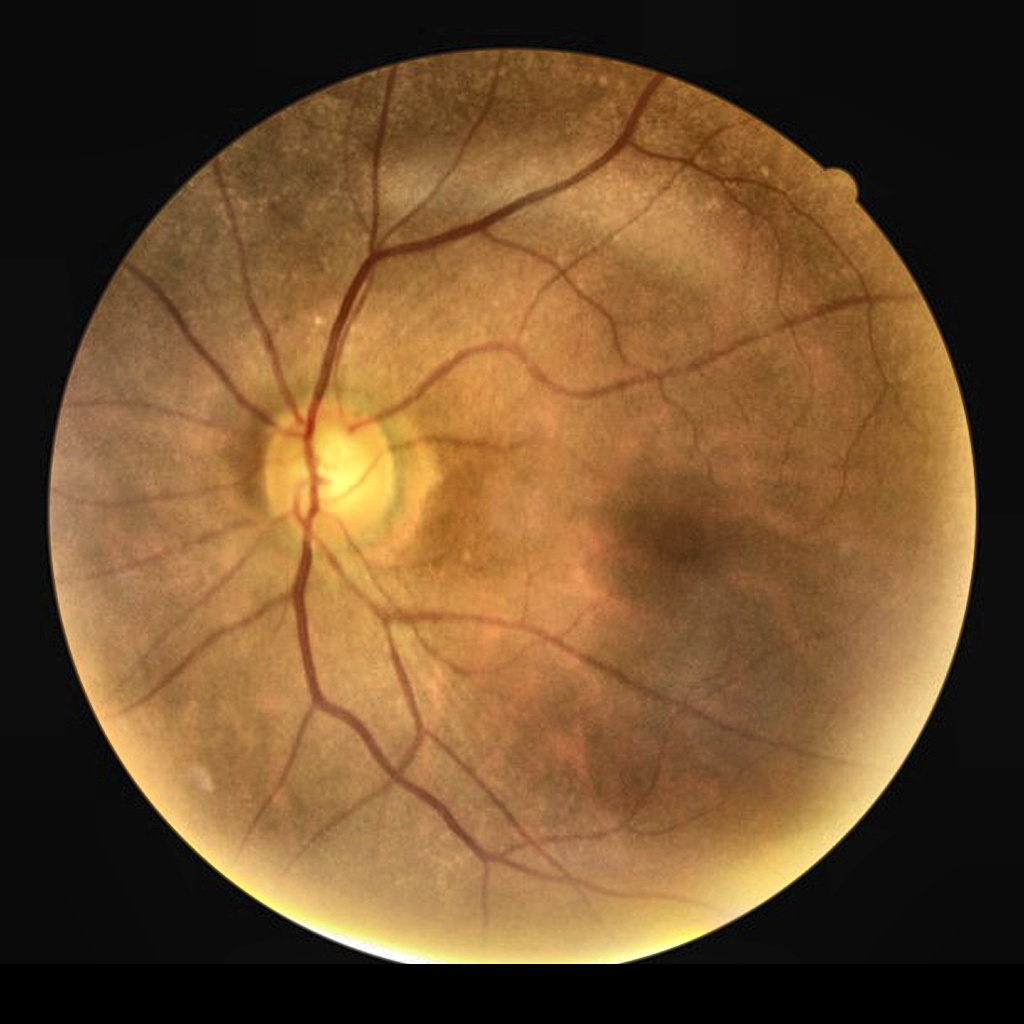

In [19]:
FD_img_list = [os.path.join(data_Dir + FD_img, file) for file in os.listdir(data_Dir + FD_img)]
sample_FD_img_path = random.choice(FD_img_list) #FV_img_list[1]
sample_FD_img = Image.open(sample_FD_img_path)

print(f"Image size: {sample_FD_img.size}")

display(Markdown("**Fundus  view**"))
display(Markdown(f"*{sample_FD_img_path}*"))
display(sample_FD_img)

**Field view**

*/home/u3148947/data/PACG/PACG_fovea_centered_FV/1944844_L_FV.png*

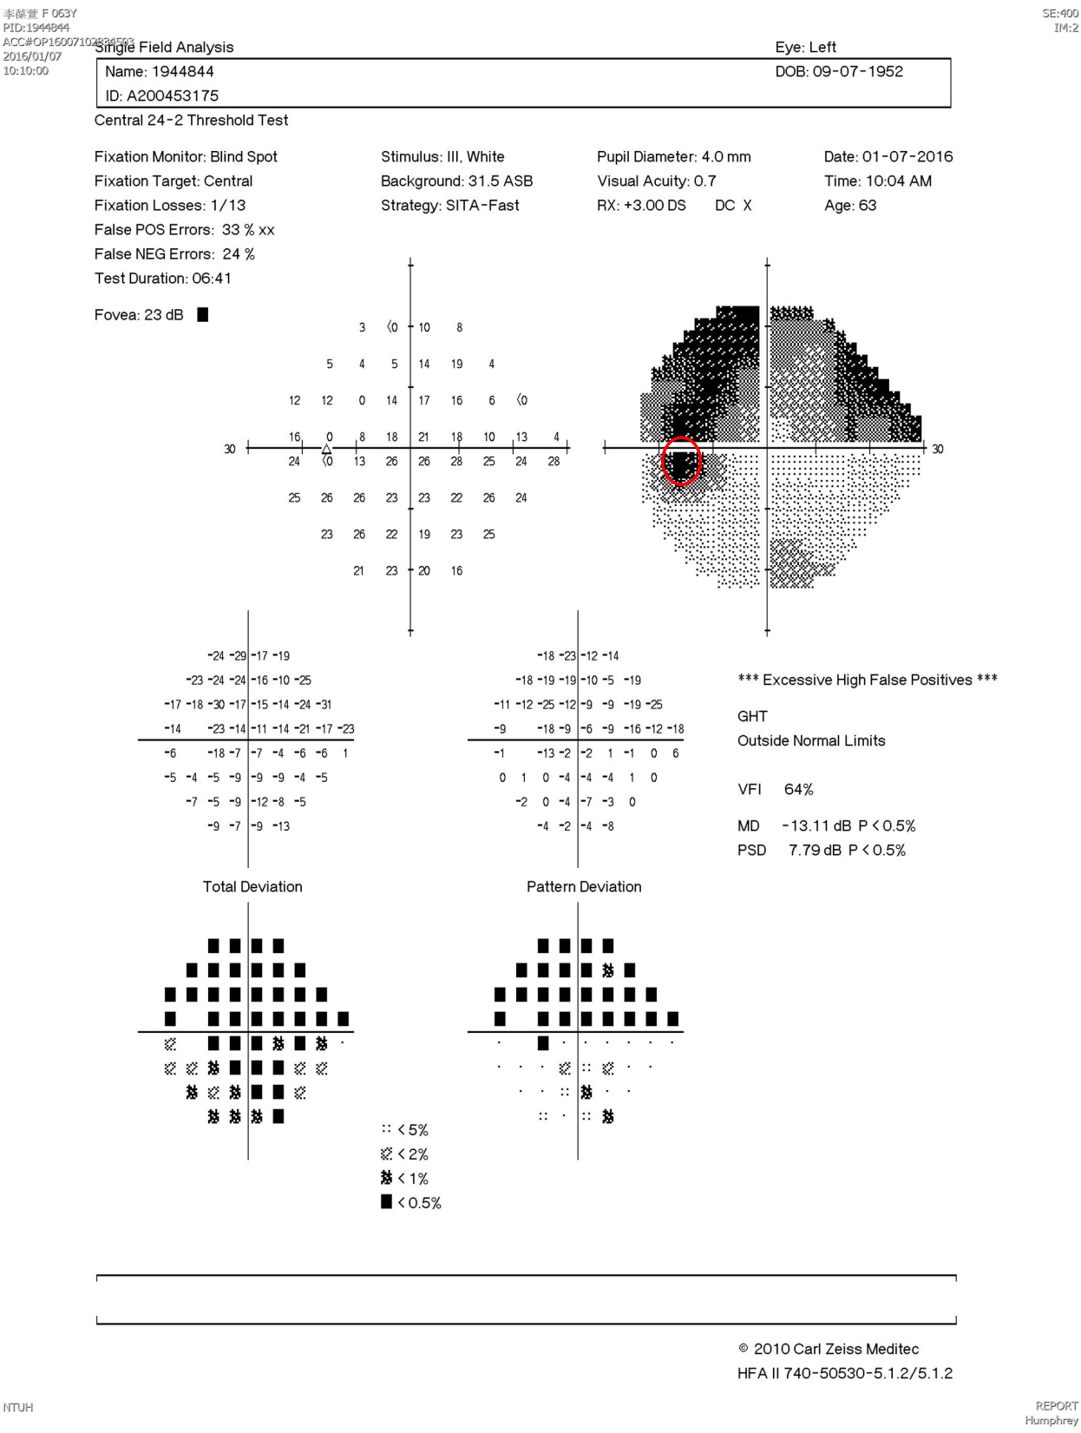

In [20]:
# FV_img_list = os.listdir(data_Dir + FV_img)
FV_img_list = [os.path.join(data_Dir + FV_img, file) for file in os.listdir(data_Dir + FV_img)]
sample_FV_img_path = random.choice(FV_img_list) #FV_img_list[1]
sample_FV_img = Image.open(sample_FV_img_path)

display(Markdown("**Field view**"))
display(Markdown(f"*{sample_FV_img_path}*"))
display(sample_FV_img)

In [21]:
!ls ~/data/PACG/PACG_fovea_centered_FV

0409018_FV.png	1944844_FV.png	  3383522_FV.png  4509932_FV.png
0542512_FV.png	1944844_L_FV.png  3931845_FV.png  4509932_L_FV.png
1861019_VF.jpg	2743854_FV.jpg	  4389721_FV.png  5785071_FV.jpg


#### FD_cod on FD_img

In [22]:

FD_cod_sample_1 = "0409018.txt"
FD_img_sample_1 = "0409018.jpg"

FD_cod_sample_1 = os.path.join(data_Dir + FD_cod,  FD_cod_sample_1)
FD_cod_sample_1 = [ cord.replace("\n", "") for cord in open(FD_cod_sample_1).readlines()]


display(Markdown("**Fundus  coordinate**"))
display(Markdown(f"*{FD_cod_sample_1}*"))
display(FD_cod_sample_1)

# x,y = FD_cod_sample_1[0][:]

**Fundus  coordinate**

*['302,484', '678,538', '-16']*

['302,484', '678,538', '-16']

In [23]:
FD_cod_sample_1[0].split(",")

['302', '484']

In [24]:
disc_x,disc_y = FD_cod_sample_1[0].split(",")

In [25]:
disc_x,disc_y

('302', '484')

In [26]:
macu_x,macu_y = FD_cod_sample_1[1].split(",")

In [27]:
macu_x,macu_y 

('678', '538')

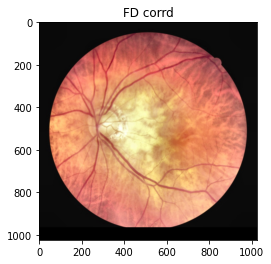

In [28]:
FD_img_sample_1 = os.path.join(data_Dir + FD_img,  FD_img_sample_1)
FD_img_sample_1 = cv2.imread(FD_img_sample_1)
FD_img_sample_1 = cv2.cvtColor(FD_img_sample_1, cv2.COLOR_BGR2RGB)

plt.imshow(FD_img_sample_1)
plt.title('FD corrd')
plt.show()

In [29]:
#Draw a red circle with zero radius and -1 for filled circle
FD_img_sample_1_point = cv2.circle(FD_img_sample_1, (int(disc_x),int(disc_y)), radius=10, color=(0, 0, 255), thickness=-1)
FD_img_sample_1_point = cv2.circle(FD_img_sample_1, (int(macu_x),int(macu_y)), radius=10, color=(255, 0, 0), thickness=-1)

#Draw a marker on image
FD_img_sample_1_point = cv2.drawMarker(FD_img_sample_1, (int(disc_x),int(disc_y)), markerType=0, markerSize=80, color=(0, 0, 255), thickness=6)
FD_img_sample_1_point = cv2.drawMarker(FD_img_sample_1, (int(macu_x),int(macu_y)), markerType=0, markerSize=80, color=(255, 0, 0), thickness=6)

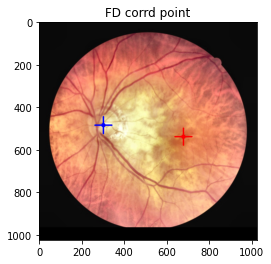

In [30]:
plt.imshow(FD_img_sample_1_point)
plt.title('FD corrd point')
plt.show()

### Create dataset
    * read image path and FV_vale to a single CSV
    * tfdata made from above pd csv

In [19]:
# # all value mix in to one column
# df_img_value = pd.DataFrame({'filename': file_name_list,
#                              'fv_value': FV_val_list})
# df_img_value.to_csv("FV_image_value.csv", index=False)

In [33]:
# create columns name
for col in range(1,53):
    print(f" 'fv_{col}',")

 'fv_1',
 'fv_2',
 'fv_3',
 'fv_4',
 'fv_5',
 'fv_6',
 'fv_7',
 'fv_8',
 'fv_9',
 'fv_10',
 'fv_11',
 'fv_12',
 'fv_13',
 'fv_14',
 'fv_15',
 'fv_16',
 'fv_17',
 'fv_18',
 'fv_19',
 'fv_20',
 'fv_21',
 'fv_22',
 'fv_23',
 'fv_24',
 'fv_25',
 'fv_26',
 'fv_27',
 'fv_28',
 'fv_29',
 'fv_30',
 'fv_31',
 'fv_32',
 'fv_33',
 'fv_34',
 'fv_35',
 'fv_36',
 'fv_37',
 'fv_38',
 'fv_39',
 'fv_40',
 'fv_41',
 'fv_42',
 'fv_43',
 'fv_44',
 'fv_45',
 'fv_46',
 'fv_47',
 'fv_48',
 'fv_49',
 'fv_50',
 'fv_51',
 'fv_52',


In [40]:
# what is our value list
[v for v in FV_val_list[0]]

['0',
 '0',
 '6',
 '2',
 '0',
 '3',
 '2',
 '1',
 '0',
 '2',
 '0',
 '0',
 '0',
 '0',
 '4',
 '0',
 '3',
 '0',
 '0',
 '0',
 '0',
 '0',
 '10',
 '16',
 '0',
 '0',
 '23',
 '25',
 '27',
 '27',
 '26',
 '27',
 '0',
 '22',
 '24',
 '27',
 '24',
 '25',
 '24',
 '26',
 '28',
 '15',
 '25',
 '27',
 '22',
 '21',
 '27',
 '25',
 '24',
 '24',
 '19',
 '14']

In [43]:
# and name list
[n for n in file_name_list]

['1944844',
 '5785071',
 '4509932',
 '1944844_L',
 '1861019',
 '3931845',
 '0542512',
 '4389721',
 '3383522',
 '2743854',
 '4509932_L',
 '0409018']

In [57]:
# convert string list to int
FV_val_list_int = [int(v) for v in FV_val_list[0]]
FV_val_list_int

[0,
 0,
 6,
 2,
 0,
 3,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 4,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 10,
 16,
 0,
 0,
 23,
 25,
 27,
 27,
 26,
 27,
 0,
 22,
 24,
 27,
 24,
 25,
 24,
 26,
 28,
 15,
 25,
 27,
 22,
 21,
 27,
 25,
 24,
 24,
 19,
 14]

In [74]:
data_n_v = []


# for v in FV_val_list:
#     for n in file_name_list:
#         print(n,v)   


for n,v in zip(file_name_list,FV_val_list): # here, n=str, v=int
    v = [int(vv) for vv in v]
    print(n,v)   
    joint_list_n_v = [n] + v
    data_n_v.append(joint_list_n_v)

print()
print(data_n_v)

1944844 [0, 0, 6, 2, 0, 3, 2, 1, 0, 2, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 10, 16, 0, 0, 23, 25, 27, 27, 26, 27, 0, 22, 24, 27, 24, 25, 24, 26, 28, 15, 25, 27, 22, 21, 27, 25, 24, 24, 19, 14]
5785071 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 27, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4509932 [4, 0, 12, 8, 2, 10, 8, 3, 0, 10, 3, 8, 0, 14, 4, 0, 0, 15, 6, 14, 18, 28, 27, 4, 0, 11, 2, 17, 11, 30, 31, 17, 0, 12, 14, 0, 28, 27, 28, 21, 5, 13, 6, 26, 25, 24, 13, 17, 20, 26, 24, 9]
1944844_L [3, 0, 10, 8, 5, 4, 5, 14, 19, 4, 12, 12, 0, 14, 17, 16, 6, 0, 16, 0, 8, 18, 21, 18, 10, 13, 24, 0, 13, 26, 26, 28, 25, 24, 25, 26, 26, 23, 23, 22, 26, 24, 23, 26, 22, 19, 23, 25, 21, 23, 20, 16]
1861019 [22, 24, 19, 19, 26, 26, 27, 24, 26, 25, 23, 27, 29, 28, 28, 26, 26, 23, 25, 29, 30, 31, 29, 29, 22, 26, 24, 29, 30, 30, 30, 31, 0, 26, 24, 28, 27, 24, 0, 26, 27, 24, 19, 24, 23, 23, 28, 27, 21, 23, 24, 22]
3931845 [8, 16, 16, 8, 10,

In [89]:
# one value for one column

# initialize list of lists
#data_n_v

# Create the pandas DataFrame
df = pd.DataFrame(data_n_v, columns=['filename', 'fv_1',
 'fv_2',
 'fv_3',
 'fv_4',
 'fv_5',
 'fv_6',
 'fv_7',
 'fv_8',
 'fv_9',
 'fv_10',
 'fv_11',
 'fv_12',
 'fv_13',
 'fv_14',
 'fv_15',
 'fv_16',
 'fv_17',
 'fv_18',
 'fv_19',
 'fv_20',
 'fv_21',
 'fv_22',
 'fv_23',
 'fv_24',
 'fv_25',
 'fv_26',
 'fv_27',
 'fv_28',
 'fv_29',
 'fv_30',
 'fv_31',
 'fv_32',
 'fv_33',
 'fv_34',
 'fv_35',
 'fv_36',
 'fv_37',
 'fv_38',
 'fv_39',
 'fv_40',
 'fv_41',
 'fv_42',
 'fv_43',
 'fv_44',
 'fv_45',
 'fv_46',
 'fv_47',
 'fv_48',
 'fv_49',
 'fv_50',
 'fv_51',
 'fv_52',
])

df.to_csv("FV_image_value.csv", index=False)


In [77]:
df_img_value = df

In [78]:
df_img_value #.head()

,filename,fv_1,fv_2,fv_3,fv_4,fv_5,fv_6,fv_7,fv_8,fv_9,...,fv_43,fv_44,fv_45,fv_46,fv_47,fv_48,fv_49,fv_50,fv_51,fv_52
0,1944844,0,0,6,2,0,3,2,1,0,...,25,27,22,21,27,25,24,24,19,14
1,5785071,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4509932,4,0,12,8,2,10,8,3,0,...,6,26,25,24,13,17,20,26,24,9
3,1944844_L,3,0,10,8,5,4,5,14,19,...,23,26,22,19,23,25,21,23,20,16
4,1861019,22,24,19,19,26,26,27,24,26,...,19,24,23,23,28,27,21,23,24,22
5,3931845,8,16,16,8,10,8,13,13,16,...,16,23,24,24,27,23,19,20,24,24
6,0542512,22,20,22,22,23,26,23,24,24,...,23,26,24,25,27,23,27,25,22,21
7,4389721,24,25,26,25,25,25,27,28,28,...,25,27,23,28,28,21,27,23,23,22
8,3383522,17,13,10,5,22,25,21,17,18,...,25,26,26,25,28,30,28,26,26,24
9,2743854,0,0,0,0,15,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_img_value['filename'][0]

0       1944844
1       5785071
2       4509932
3     1944844_L
4       1861019
5       3931845
6       0542512
7       4389721
8       3383522
9       2743854
10    4509932_L
11      0409018
Name: filename, dtype: object

In [88]:
df_img_value['fv_52'][0]

14

In [81]:
# len(df_img_value['fv_value'][0])

In [82]:
# df_img_value['fv_value'][0]

In [83]:
# df_img_value['fv_value']

In [99]:
# FV_img_value_slices = tf.data.Dataset.from_tensor_slices(df_img_value['filename'])
# FV_img_value_slices = tf.data.Dataset.from_tensor_slices(df_img_value['fv_value'][0])
# FV_img_value_slices = tf.data.Dataset.from_tensor_slices((df_img_value['filename'], df_img_value['fv_value']))

# FV_img_value_slices = tf.data.Dataset.from_tensor_slices(dict(df_img_value))

# 尚解不出可行模式 包成OrderedDict後 數值無法讀出
# FV_img_value_slices = tf.data.experimental.make_csv_dataset("FV_image_value.csv", batch_size=1, select_columns=["filename","fv_value"], label_name="fv_value",)
FV_img_value_slices = tf.data.experimental.make_csv_dataset("FV_image_value.csv", batch_size=1)#, select_columns=["filename","fv_value"], label_name="fv_value",)


for feature_batch in FV_img_value_slices.take(1):
    # check OrderedDict
    print(feature_batch)
    print()
    
    print(feature_batch['filename'])
    print(feature_batch['fv_value'])
    print()
    
    tf.print(feature_batch['filename'])
    tf.print(feature_batch['fv_value'])
    print()
    
#     for key, value in zip(feature_batch[0]['filename'],feature_batch[1]):
#         print("  {} <:::> {}".format(key, value))

#     for key, value in feature_batch.items(): # just check item name not the value
#         print(f'  {key}, {value}')
#         print(type(key), type(value))
        
#     for key, value in feature_batch:
#         print(f'  {key}, {value}')
#         print(type(key), type(value))

OrderedDict([('filename', <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'3383522'], dtype=object)>), ('fv_value', <tf.Tensor: shape=(1,), dtype=string, numpy=
array([b"['17', '13', '10', '5', '22', '25', '21', '17', '18', '8', '16', '23', '23', '11', '2', '18', '20', '21', '18', '20', '25', '0', '7', '0', '22', '29', '24', '26', '28', '28', '29', '27', '0', '25', '26', '29', '29', '29', '28', '26', '25', '24', '25', '26', '26', '25', '28', '30', '28', '26', '26', '24']"],
      dtype=object)>)])

tf.Tensor([b'3383522'], shape=(1,), dtype=string)
tf.Tensor([b"['17', '13', '10', '5', '22', '25', '21', '17', '18', '8', '16', '23', '23', '11', '2', '18', '20', '21', '18', '20', '25', '0', '7', '0', '22', '29', '24', '26', '28', '28', '29', '27', '0', '25', '26', '29', '29', '29', '28', '26', '25', '24', '25', '26', '26', '25', '28', '30', '28', '26', '26', '24']"], shape=(1,), dtype=string)

["3383522"]
["[\'17\', \'13\', \'10\', \'5\', \'22\', \'25\', \'21\', \'17\', \'18\', \'8\', 

In [79]:
features, label = next(iter(FV_img_value_slices))

features

'filename'

In [84]:
# features['filename'].numpy()
features[:]

'filename'

In [85]:
label

'fv_value'

#### How to efficiently use a tf.data.Dataset made of ordereddict?

In [41]:
FV_img_value_slices

<PrefetchDataset shapes: (OrderedDict([(filename, (1,))]), (1,)), types: (OrderedDict([(filename, tf.string)]), tf.string)>

In [42]:
FV_img_value_slices.element_spec

(OrderedDict([('filename',
               TensorSpec(shape=(1,), dtype=tf.string, name=None))]),
 TensorSpec(shape=(1,), dtype=tf.string, name=None))

In [43]:
type(FV_img_value_slices)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [44]:
# FV_img_value_slices = tf.data.Dataset.from_tensor_slices(dict(df_img_value))


# for feature_batch in titanic_slices.take(1):
#     for key, value in feature_batch.items():
# #         print("  {!r:20s}: {}".format(key, value))
#         print("  {}: {}".format(key, value))

In [64]:
def process_path(fn, fv):
    #label = tf.strings.split(file_path, os.sep)[-2]

    print(f'fn== {fn.values()} ---\n fv== {fv}')
#     print(fn['filename'])
#     filename = fn + ".jpg"
#     file_path = os.path.join(data_Dir + FD_img, filename)
#     print(file_path)

#     return tf.io.read_file(file_path), fv
    return 0

FV_ds = FV_img_value_slices.map(process_path)

fn== odict_values([<tf.Tensor 'args_0:0' shape=(1,) dtype=string>]) ---
 fv== Tensor("args_1:0", shape=(1,), dtype=string)


In [ ]:
for image_raw, label_text in FV_img_value_slices.take(1):
    print(repr(image_raw.numpy()[:100]))
    print()
    print(label_text.numpy())

## Regression model

In [ ]:
# !cp tf.ds.pipeline/foot_plantar/facial-keypoints/Assignment-2-LSW-20220914-PCGA.ipynb .

In [ ]:
"""
move to "Assignment-2-LSW-20220914-PCGA.ipynb"
"""

### Evaluation of model